In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Deep_leearning/13_Dropout_regularaizetion/sonar_dataset.csv',header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [12]:
df.shape


(208, 61)

In [25]:
X=df.drop(60,axis='columns')
y=df[60]


In [29]:
y=pd.get_dummies(y,drop_first=True)


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [31]:
import tensorflow as tf
from tensorflow import keras


In [34]:
model=keras.Sequential([
                        keras.layers.Dense(60,input_shape=(60,),activation='relu'),
                        keras.layers.Dense(30,activation='relu'),
                        keras.layers.Dense(15,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100,batch_size=6)

Epoch 1/100
28/28 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.5361
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.6024
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6425 - accuracy: 0.6145
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 0.6189 - accuracy: 0.7048
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.7169
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7470
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.8072
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.8253
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.8072
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8012
Epoch 11/

In [35]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.0023 - accuracy: 0.7619


[1.0022516250610352, 0.761904776096344]

In [37]:
y_predict=model.predict(X_test).reshape(-1)

In [38]:
y_predict[:5]

array([5.0281013e-10, 9.0392351e-01, 9.6680397e-01, 9.3848428e-07,
       9.9999940e-01], dtype=float32)

In [39]:
import numpy as np
y_predict=np.round(y_predict)

In [40]:
y_predict[:5]

array([0., 1., 1., 0., 1.], dtype=float32)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.83      0.68      0.75        22

    accuracy                           0.76        42
   macro avg       0.77      0.77      0.76        42
weighted avg       0.77      0.76      0.76        42



In [49]:
modeld=keras.Sequential([
                        keras.layers.Dense(60,input_shape=(60,),activation='relu'),
                        keras.layers.Dropout(0.5),
                        keras.layers.Dense(30,activation='relu'),
                        keras.layers.Dropout(0.30),
                        keras.layers.Dense(15,activation='relu'),
                        keras.layers.Dropout(0.40),
                        keras.layers.Dense(1,activation='sigmoid')
])
modeld.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
modeld.fit(X_train,y_train,epochs=100,batch_size=6)

Epoch 1/100
28/28 [==============================] - 1s 4ms/step - loss: 0.7191 - accuracy: 0.4277
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.7058 - accuracy: 0.5060
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.4337
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4819
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5663
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5602
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5301
Epoch 8/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5602
Epoch 9/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.5964
Epoch 10/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5663
Epoch 11/

In [50]:
modeld.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.5334 - accuracy: 0.7857


[0.5334001779556274, 0.7857142686843872]

In [52]:
y_predict=modeld.predict(X_test).reshape(-1)
y_predict=np.round(y_predict)
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.81      0.77      0.79        22

    accuracy                           0.79        42
   macro avg       0.79      0.79      0.79        42
weighted avg       0.79      0.79      0.79        42



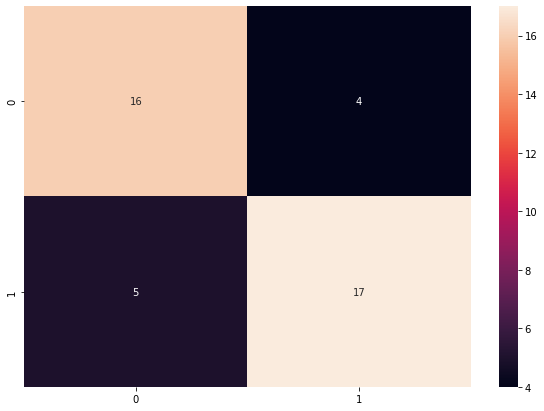

In [53]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)